In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

0 0.4787377
20 0.0067541557
40 0.005182437
60 0.004695408
80 0.0042558806
100 0.0038588971
120 0.003500247
140 0.0031762742
160 0.0028837724
180 0.0026198889
200 0.0023820605
220 0.0021679623
240 0.001975476
260 0.0018026563
280 0.0016477166
300 0.0015090078
320 0.001385012
340 0.001274329
360 0.0011756715
380 0.0010878525
400 0.0010097885
420 0.00094048487
440 0.0008790349
460 0.00082461117
480 0.00077646435
500 0.0007339141
520 0.00069634855
540 0.0006632116
560 0.00063400716
580 0.00060828676
600 0.0005856518
620 0.0005657435
640 0.0005482445
660 0.0005328696
680 0.00051936705
700 0.00050751184
720 0.000497107
740 0.00048797473
760 0.00047996204
780 0.00047293075
800 0.00046676022
820 0.00046134408
840 0.00045658884
860 0.00045241215
880 0.00044874076
900 0.00044551276
920 0.00044267162
940 0.00044016913
960 0.00043796113
980 0.00043601223
1000 0.000434289
1020 0.00043276223
1040 0.00043140762
1060 0.00043020328
1080 0.00042912975
1100 0.00042817087
1120 0.00042731198
1140 0.0004265

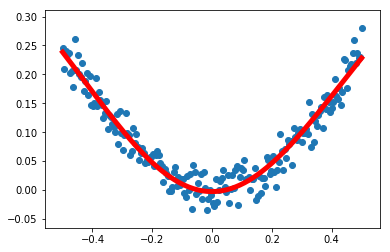

In [4]:
# Generate 200 samples
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# Define two place holders
# 'None' means the number of rows will be set and confirmed when the data is feed into the place holders.
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# Define the hidden layer
Weight_L1 = tf.Variable(tf.random.normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weight_L1) + biases_L1
# Activation function
L1 = tf.nn.tanh(Wx_plus_b_L1)

# Define the output layer
Weight_L2 = tf.Variable(tf.random.normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# Quadratic loss functio and gradient descent training method
loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range (2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        if step % 20 == 0:
            print(step, sess.run(loss,feed_dict = {x:x_data,y:y_data}))
        
    # Get the prediction
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    # Plot
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'-r',lw = 5)
    plt.show()
        
